In [1]:
# Import libraries

import cv2
import matplotlib
from plantcv import plantcv as pcv



In [2]:
class options:
    def __init__(self):
        self.image = "./img/color_image.jpg"
        self.debug = "plot"
        self.writeimg= False 
        self.result = "ml_tutorial_results.json"
        self.outdir = "."

# Get options
args = options()
pcv.params.outdir = args.outdir

# Set debug to the global parameter 
pcv.params.debug = args.debug


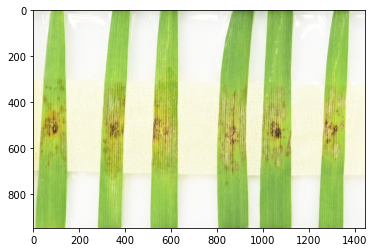

In [3]:
# Read image 

# Inputs:
#   filename - Image file to be read in 
#   mode - Return mode of image; either 'native' (default), 'rgb', 'gray', or 'csv' 
img, path, filename = pcv.readimage(filename="mock-fusa.png") #mock-fusa.png


C:\Users\mlaz0001\Anaconda3\lib\site-packages\plantcv\plantcv\plot_image.py:37: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
C:\Users\mlaz0001\Anaconda3\lib\site-packages\plantcv\plantcv\plot_image.py:32: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


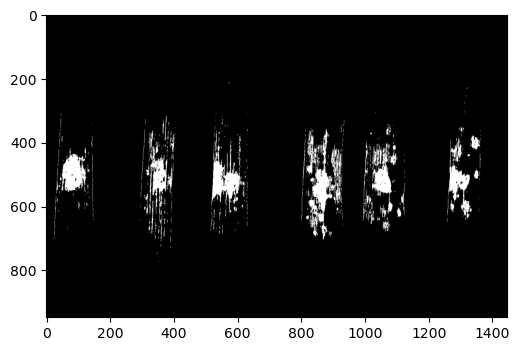

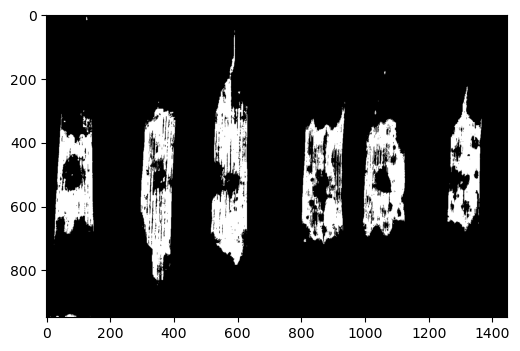

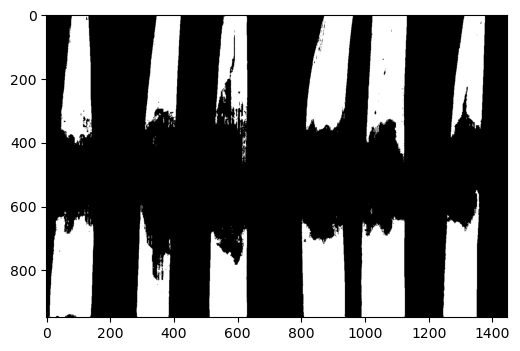

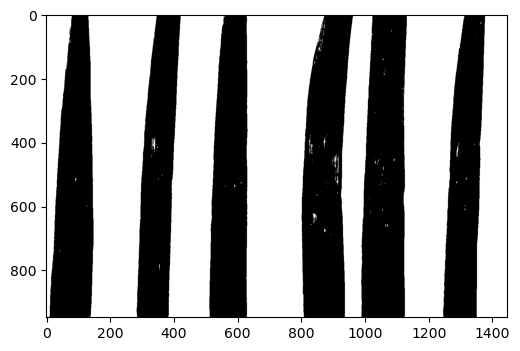

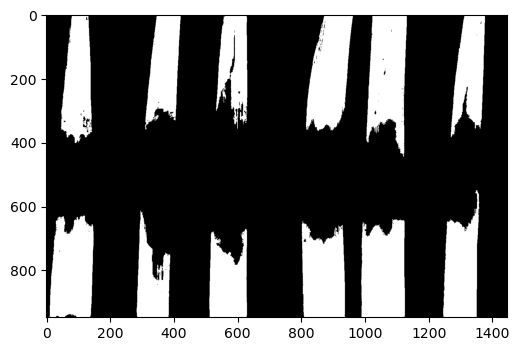

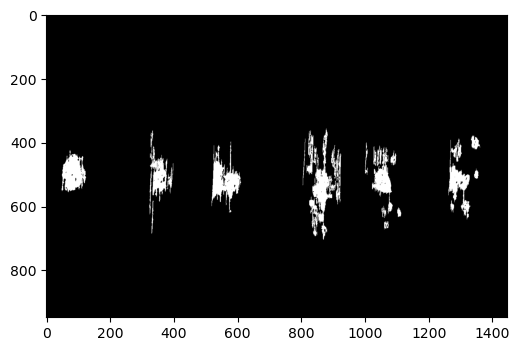

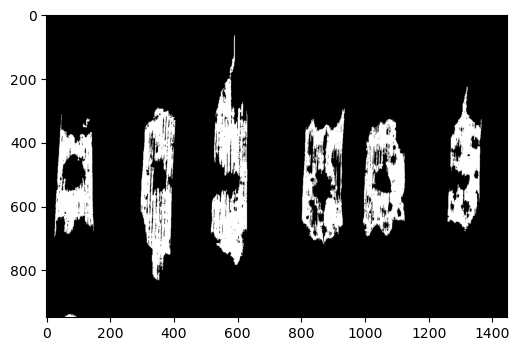

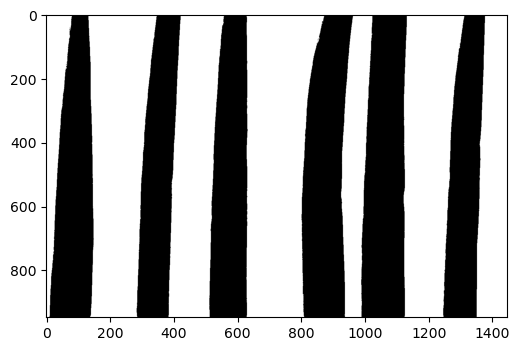

In [4]:
# Use the output file from `plantcv-train.py` to run the multiclass 
# naive bayes classification on the image. The function below will 
# print out 4 masks (plant, pustule, chlorosis, background)

# Inputs: 
#   rgb_img - RGB image data 
#   pdf_file - Output file containing PDFs from `plantcv-train.py`

import plantcv.learn

#teaching the naive bayes algorithm. Original file "Naive-Bayes-training.txt"

plantcv.learn.naive_bayes_multiclass("Fusarium-2.txt", "outfile naive_bayes_pdfs.txt",  mkplots = "True")

#applying masks

mask = pcv.naive_bayes_classifier(rgb_img=img, 
                                  pdf_file="outfile naive_bayes_pdfs.txt")

#optional. Filtering the image if you have too much points

fill_image = pcv.fill(bin_img=mask['Plant'], size=200)
fill_image = pcv.fill(bin_img=mask['Pustule'], size=200)
fill_image = pcv.fill(bin_img=mask['Chlorosis'], size=200)
fill_image = pcv.fill(bin_img=mask['Background'], size=200)

C:\Users\mlaz0001\Anaconda3\lib\site-packages\plantcv\plantcv\plot_image.py:27: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


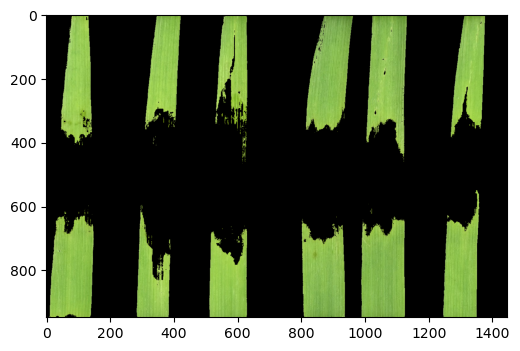

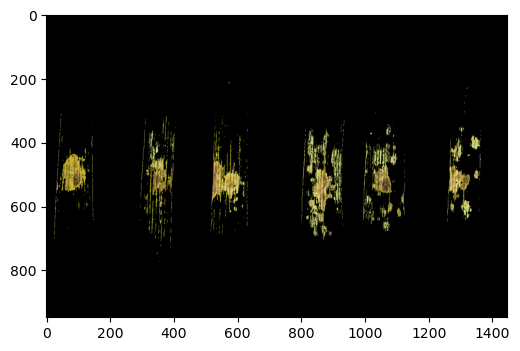

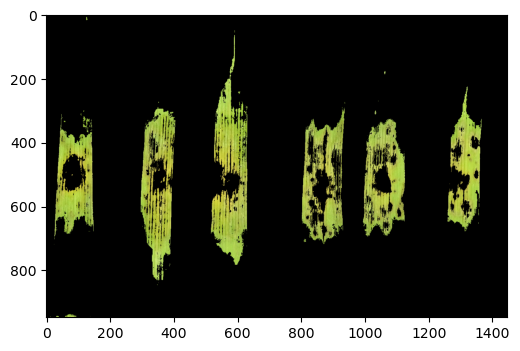

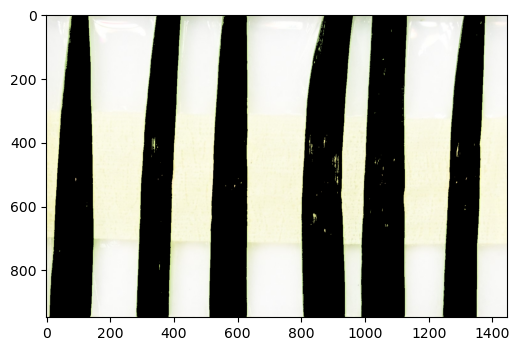

In [5]:
# We can apply each mask to the original image to more accurately 
# see what got masked

# Inputs:
#   img - RGB or grayscale image data 
#   mask - Binary mask image data 
#   mask_color - 'white' or 'black' 
plant_img = pcv.apply_mask(mask=(mask['Plant']), img=img, mask_color='black')
pustule_img = pcv.apply_mask(mask=(mask['Pustule']), img=img, mask_color='black')
chlorosis_img = pcv.apply_mask(mask=(mask['Chlorosis']), img=img, mask_color='black')
background_img = pcv.apply_mask(mask=(mask['Background']), img=img, mask_color='black')


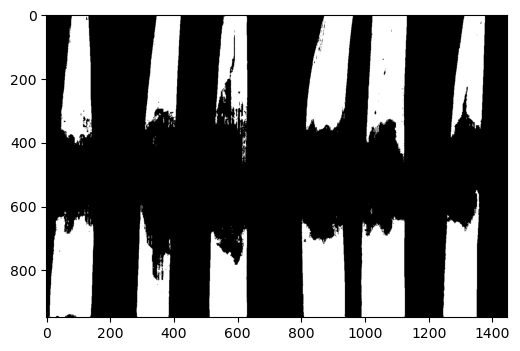

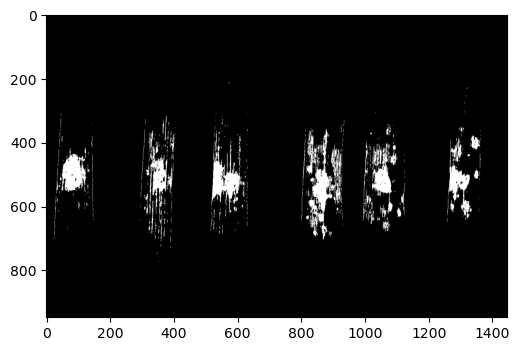

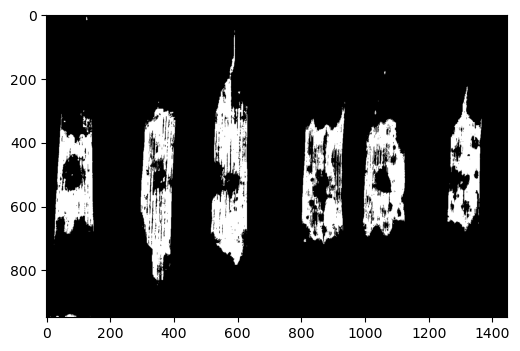

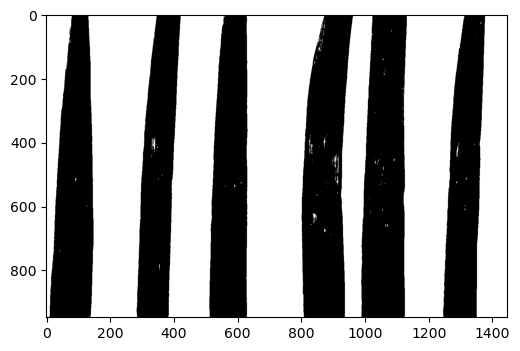

In [6]:
# Write image and mask with the same name to the path 
# specified (creates two folders within the path if they do not exist).

# Inputs: 
#   img - RGB or grayscale image data, original image 
#   mask - Binary mask image created 
#   filename - Image filename to get saved as
#   outdir - Output directory (default: None)
#   mask_only - Defaults to False, if True then only outputs mask 
plant_maskpath, plant_analysis_images = pcv.output_mask(img=img, mask=mask['Plant'], 
                                                        filename='plant.png', mask_only=True)
pust_maskpath, pust_analysis_images = pcv.output_mask(img=img, mask=mask['Pustule'], 
                                                      filename='pustule.png', mask_only=True)
chlor_maskpath, chlor_analysis_images = pcv.output_mask(img=img, mask=mask['Chlorosis'], 
                                                        filename='chlorosis.png', mask_only=True)
bkgrd_maskpath, bkgrd_analysis_images = pcv.output_mask(img=img, mask=mask['Background'], 
                                                        filename='background.png', mask_only=True)


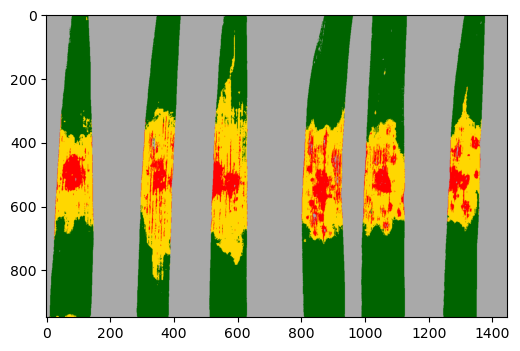

In [7]:
# To see all of these masks together we can plot them with plant set to green,
# chlorosis set to gold, and pustule set to red.

# Inputs:
#   masks - List of masks (the different classes returned by naive_bayes_classifier)
#   colors - List of colors to assign to each class. Users can either provide a 
#   list of color names (str) or can provide tuples of custom BGR values
classified_img = pcv.visualize.colorize_masks(masks=[mask['Plant'], mask['Pustule'], 
                                                     mask['Chlorosis'], mask['Background']], 
                                              colors=['dark green', 'red', 'gold', 'gray'])


In [8]:
import numpy as np

# Calculate percent of the plant found to be diseased 
sick_plant = np.count_nonzero(mask['Pustule']) + np.count_nonzero(mask['Chlorosis'])
healthy_plant = np.count_nonzero(mask['Plant'])
percent_diseased = sick_plant / (sick_plant + healthy_plant)


pustules = np.count_nonzero(mask['Pustule'])
pcv.outputs.add_observation(sample='default', variable='pustules', trait='pixels classified as pustule',
                            method='number of pixels', scale='percent', datatype=float,
                            value=pustules, label='percent')
chlorosis = np.count_nonzero(mask['Chlorosis'])
pcv.outputs.add_observation(sample='default', variable='chlorosis', trait='pixels classified as chlorosis',
                            method='number of pixels', scale='percent', datatype=float,
                            value=chlorosis, label='percent')
healthy = np.count_nonzero(mask['Plant'])
pcv.outputs.add_observation(sample='default', variable='plant', trait='pixels classified as plant',
                            method='number of pixels', scale='percent', datatype=float,
                            value=healthy, label='percent')
background = np.count_nonzero(mask['Background'])
pcv.outputs.add_observation(sample='default', variable='background', trait='pixels classified as bakcground',
                            method='number of pixels', scale='percent', datatype=float,
                            value=background, label='percent')

In [9]:
# Create a new measurement (gets saved to the outputs class) 

# Inputs:
#    sample - A sample name or label
#    variable - The name of the variable for the observation to get stored. Must be unique to other variable names
#               since data is a dictionary format where variable is the key.
#    trait - Description of the observation getting stored
#    method - Description of the method for calculating the observation
#    scale - Observation scale
#    datatype - The datatype of the observation, most commonly either bool, str, int, float, list 
#    value - Value of the observation getting stored
#    label - Label for the observation getting stored. Required for list datatype observations. 
pcv.outputs.add_observation(sample='default', variable='percent_diseased', trait='percent of plant detected to be diseased',
                            method='ratio of pixels', scale='percent', datatype=float,
                            value=percent_diseased, label='percent')


In [10]:
# Data stored to the outputs class can be accessed using the variable name
pcv.outputs.observations['default']['pustules']['value']

55498

In [11]:
pcv.outputs.observations['default']['chlorosis']['value']

172911

In [12]:
pcv.outputs.observations['default']['plant']['value']

370275

In [13]:
pcv.outputs.observations['default']['background']['value']

771176

In [ ]:
pcv.outputs.save_results(filename=args.result)

In [21]:
#roc curves and metrics
from sklearn.metrics import roc_curve, auc

Y_mask_score = mask['Plant'].predict(Test.txt)
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(Test_y.txt, Y_mask_score[:, 1])

AttributeError: 'numpy.ndarray' object has no attribute 'predict'

In [23]:
type(mask)

dict

In [17]:
# The save results function will take the measurements stored when running any PlantCV analysis functions, format, 
# and print an output text file for data analysis. The Outputs class stores data whenever any of the following functions
# are ran: analyze_bound_horizontal, analyze_bound_vertical, analyze_color, analyze_nir_intensity, analyze_object, 
# fluor_fvfm, report_size_marker_area, watershed. If no functions have been run, it will print an empty text file 
pcv.outputs.save_results(filename=args.result)


In [3]:
import plantcv.parallel

# Create a WorkflowConfig instance
config = plantcv.parallel.WorkflowConfig()

config.save_config(config_file="my_config.json")

C:\Users\mlaz0001\Anaconda3\lib\site-packages\dask_jobqueue\core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.


In [19]:
config.import_config(config_file="my_config.json")

# Change configuration values directly in Python as needed. At a minimum you must specify input_dir, json, filename_metadata, workflow.
config.input_dir = "C:/Users/mlaz0001/Desktop/my_images"
config.img_outdir= "C:/Users/mlaz0001/Desktop/results"
config.json = "output.json"
config.filename_metadata = ["plantbarcode"]
config.workflow = "C:/Users/mlaz0001/Anaconda3/envs/plantcv/Scripts/plantcv-pipeline2.py"
config.other_args = ["--pdfs", "C:/Users/mlaz0001/Anaconda3/envs/plantcv/Scripts/pdfs_naive_bayes_pdfs.txt"]

# Check for errors
config.validate_config()

# If it passes, save your configuration
config.save_config(config_file="my_config.json")